In [7]:
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'svg'

In [8]:
data = pd.read_csv('data.csv')  # read csv
X = data.iloc[:, :25]  # X feature
X

,MA,FA,Cs,Pb,Sn,Other,I,Br,Gap,Po,...,Add_H,Step,Solvent,Coated1_v,Coated1_t,Coated2_v,Coated2_t,Antisolvent,Anneal_T,Anneal_t
0,1.0,0.00,0.00,1.0,0.0,0.0,1.0,0.0,0.615970,1,...,0,0.5,0.75,0.500,0.222222,0.000000,0.000000,1,0.285714,0.022222
1,1.0,0.00,0.00,1.0,0.0,0.0,1.0,0.0,0.615970,0,...,0,0.5,0.75,0.500,0.333333,0.000000,0.000000,1,0.285714,0.111111
2,1.0,0.00,0.00,1.0,0.0,0.0,1.0,0.0,0.612167,0,...,0,0.5,1.00,0.500,0.333333,0.000000,0.000000,1,0.285714,0.111111
3,1.0,0.00,0.00,1.0,0.0,0.0,1.0,0.0,0.612167,0,...,0,0.5,1.00,0.500,0.333333,0.000000,0.000000,1,0.285714,0.111111
4,1.0,0.00,0.00,1.0,0.0,0.0,1.0,0.0,0.612167,0,...,0,0.5,1.00,0.500,0.333333,0.000000,0.000000,1,0.285714,0.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,0.3,0.70,0.50,0.5,0.5,0.0,1.0,0.0,0.482890,0,...,1,1.0,0.75,0.125,0.111111,0.666667,0.666667,1,0.285714,0.111111
616,0.3,0.60,0.10,0.5,0.5,0.0,1.0,0.0,0.475285,0,...,0,1.0,0.75,0.125,0.111111,0.666667,0.666667,1,0.285714,0.111111
617,0.3,0.60,0.10,0.5,0.5,0.0,1.0,0.0,0.475285,0,...,0,1.0,0.75,0.125,0.111111,0.666667,0.666667,1,0.285714,0.111111
618,0.3,0.60,0.10,0.5,0.5,0.0,1.0,0.0,0.475285,0,...,0,1.0,0.75,0.125,0.111111,0.666667,0.666667,1,0.285714,0.111111


# Jsc

0:	learn: 6.0756091	total: 3.22ms	remaining: 3.22s
1:	learn: 5.9843144	total: 6.72ms	remaining: 3.35s
2:	learn: 5.8836862	total: 9.78ms	remaining: 3.25s
3:	learn: 5.7996577	total: 13.5ms	remaining: 3.36s
4:	learn: 5.7067869	total: 16ms	remaining: 3.19s
5:	learn: 5.6203934	total: 19.1ms	remaining: 3.16s
6:	learn: 5.5394460	total: 22.1ms	remaining: 3.14s
7:	learn: 5.4477602	total: 25.4ms	remaining: 3.14s
8:	learn: 5.3618018	total: 28.4ms	remaining: 3.12s
9:	learn: 5.2862382	total: 31ms	remaining: 3.07s
10:	learn: 5.2033157	total: 33.9ms	remaining: 3.05s
11:	learn: 5.1178116	total: 36.8ms	remaining: 3.03s
12:	learn: 5.0377497	total: 39.7ms	remaining: 3.02s
13:	learn: 4.9674912	total: 42.7ms	remaining: 3.01s
14:	learn: 4.8920868	total: 45.5ms	remaining: 2.99s
15:	learn: 4.8230286	total: 48.3ms	remaining: 2.97s
16:	learn: 4.7530105	total: 51.4ms	remaining: 2.97s
17:	learn: 4.6896717	total: 54.2ms	remaining: 2.95s
18:	learn: 4.6221890	total: 57.1ms	remaining: 2.95s
19:	learn: 4.5686243	total

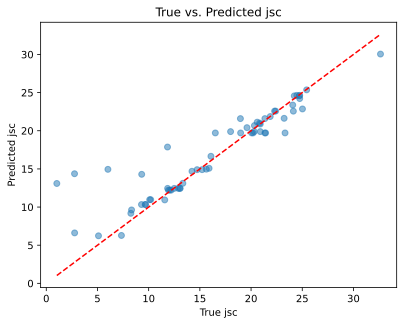

In [9]:
# 1. data split
X_jsc = data.iloc[:, :25]  # X feature
y_jsc = data['Jsc']  # target feature
X_jsc_train, X_jsc_test, y_jsc_train, y_jsc_test = train_test_split(X_jsc, y_jsc, test_size=0.1, random_state=42)

# 2. catBoost model

# parameter grid
param_grid_jsc = {
    'iterations': [500, 1000],      # 树的数量
    'learning_rate': [0.01, 0.03],   # 学习率
    'depth': [4, 6, 8],                   # 树深度
    'l2_leaf_reg': [1, 3, 5, 10],         # L2正则化系数
}

# Initialize catBoost regressor
cat = CatBoostRegressor(random_state=42) 

# 3. Grid searching for jsc
grid_jsc_search = GridSearchCV(
    estimator=cat,
    param_grid=param_grid_jsc,
    cv=5,
    scoring= {'r2': 'r2', 'neg_mse': 'neg_mean_squared_error'},  # two standard
    refit='r2',  # Select the best model based on R ²
    n_jobs=-1
)

grid_jsc_search.fit(X_jsc_train, y_jsc_train)

# Best model for jsc
best_cat_jsc = grid_jsc_search.best_estimator_


# 4. Model evaluation on test set for jsc
y_jsc_pred = best_cat_jsc.predict(X_jsc_test)
mse_jsc = mean_squared_error(y_jsc_test, y_jsc_pred)
rmse_jsc = mse_jsc**0.5
mae_jsc = mean_absolute_error(y_jsc_test, y_jsc_pred)
r2_jsc = r2_score(y_jsc_test, y_jsc_pred)

print(f"Best Parameters for jsc: {grid_jsc_search.best_params_}")
print(f"MSE: {mse_jsc:.4f}, RMSE: {rmse_jsc:.4f}, R²: {r2_jsc:.4f}, MAE:{mae_jsc}")

# 5. Get cross-validation results for jsc
cv_jsc_results_df = pd.DataFrame(grid_jsc_search.cv_results_)
cv_jsc_results_df = cv_jsc_results_df.sort_values(by='mean_test_r2', ascending=False)  # sort by r^2

# Best CV score for jsc
best_cv_jsc_score_r2 = grid_jsc_search.best_score_
best_cv_jsc_score_neg_mse = -grid_jsc_search.cv_results_['mean_test_neg_mse'][grid_jsc_search.best_index_]

for index, row in cv_jsc_results_df.head(10).iterrows():
    print(f"Params: {row['params']}")
    print(f"Mean Test R²: {row['mean_test_r2']}")
    print(f"Mean Test Neg MSE: {row['mean_test_neg_mse']}")
    print(f"Std Test R²: {row['std_test_r2']}")
    print(f"Std Test Neg MSE: {row['std_test_neg_mse']}")
    print("-" * 50)

print(f"Best Cross-Validation R² for jsc: {best_cv_jsc_score_r2}")
print(f"Best Cross-Validation neg_mean_squared_error for jsc: {best_cv_jsc_score_neg_mse}")
print(f"Best parameters via GridSearchCV for jsc: {grid_jsc_search.best_params_}")


# 6. Visualization for jsc
plt.scatter(y_jsc_test, y_jsc_pred, alpha=0.5)
plt.plot([y_jsc_test.min(), y_jsc_test.max()], [y_jsc_test.min(), y_jsc_test.max()], 'r--')
plt.xlabel('True jsc')
plt.ylabel('Predicted jsc')
plt.title('True vs. Predicted jsc')
plt.show()

# Voc

0:	learn: 0.2928854	total: 3.25ms	remaining: 3.24s
1:	learn: 0.2864880	total: 6.26ms	remaining: 3.12s
2:	learn: 0.2802356	total: 8.93ms	remaining: 2.97s
3:	learn: 0.2745365	total: 11.8ms	remaining: 2.94s
4:	learn: 0.2683959	total: 14.7ms	remaining: 2.93s
5:	learn: 0.2627296	total: 18.6ms	remaining: 3.08s
6:	learn: 0.2570878	total: 21.4ms	remaining: 3.04s
7:	learn: 0.2515129	total: 24.3ms	remaining: 3.01s
8:	learn: 0.2459543	total: 26.9ms	remaining: 2.96s
9:	learn: 0.2407246	total: 29.7ms	remaining: 2.94s
10:	learn: 0.2353464	total: 33.5ms	remaining: 3.02s
11:	learn: 0.2302624	total: 36.5ms	remaining: 3s
12:	learn: 0.2252577	total: 39.1ms	remaining: 2.97s
13:	learn: 0.2206323	total: 41.8ms	remaining: 2.95s
14:	learn: 0.2161925	total: 44.6ms	remaining: 2.93s
15:	learn: 0.2116851	total: 47.6ms	remaining: 2.93s
16:	learn: 0.2074915	total: 50.5ms	remaining: 2.92s
17:	learn: 0.2032528	total: 53.5ms	remaining: 2.92s
18:	learn: 0.1991735	total: 56.1ms	remaining: 2.9s
19:	learn: 0.1953779	total

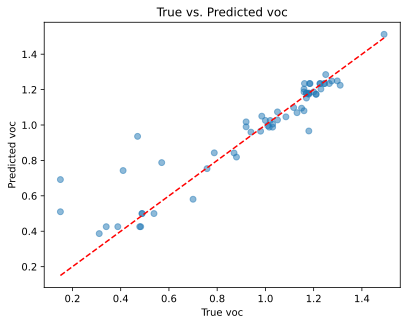

In [10]:
# 1. data split
X_voc = data.iloc[:, :25]  # X feature
y_voc = data['Voc']  # target feature
X_voc_train, X_voc_test, y_voc_train, y_voc_test = train_test_split(X_voc, y_voc, test_size=0.1, random_state=42)

# 2. catBoost model

# parameter grid
param_grid_voc = {
    'iterations': [500, 1000],      # 树的数量
    'learning_rate': [0.01, 0.03],   # 学习率
    'depth': [4, 6, 8],                   # 树深度
    'l2_leaf_reg': [1, 3, 5, 10],         # L2正则化系数
}

# Initialize catBoost regressor
cat = CatBoostRegressor(random_state=42) 

# 3. Grid searching for voc
grid_voc_search = GridSearchCV(
    estimator=cat,
    param_grid=param_grid_voc,
    cv=5,
    scoring= {'r2': 'r2', 'neg_mse': 'neg_mean_squared_error'},  # two standard
    refit='r2',  # Select the best model based on R ²
    n_jobs=-1
)

grid_voc_search.fit(X_voc_train, y_voc_train)

# Best model for voc
best_cat_voc = grid_voc_search.best_estimator_


# 4. Model evaluation on test set for voc
y_voc_pred = best_cat_voc.predict(X_voc_test)
mse_voc = mean_squared_error(y_voc_test, y_voc_pred)
rmse_voc = mse_voc**0.5
mae_voc = mean_absolute_error(y_voc_test, y_voc_pred)
r2_voc = r2_score(y_voc_test, y_voc_pred)

print(f"Best Parameters for voc: {grid_voc_search.best_params_}")
print(f"MSE: {mse_voc:.4f}, RMSE: {rmse_voc:.4f}, R²: {r2_voc:.4f}, MAE:{mae_voc}")

# 5. Get cross-validation results for voc
cv_voc_results_df = pd.DataFrame(grid_voc_search.cv_results_)
cv_voc_results_df = cv_voc_results_df.sort_values(by='mean_test_r2', ascending=False)  # sort by r^2

# Best CV score for voc
best_cv_voc_score_r2 = grid_voc_search.best_score_
best_cv_voc_score_neg_mse = -grid_voc_search.cv_results_['mean_test_neg_mse'][grid_voc_search.best_index_]

for index, row in cv_voc_results_df.head(10).iterrows():
    print(f"Params: {row['params']}")
    print(f"Mean Test R²: {row['mean_test_r2']}")
    print(f"Mean Test Neg MSE: {row['mean_test_neg_mse']}")
    print(f"Std Test R²: {row['std_test_r2']}")
    print(f"Std Test Neg MSE: {row['std_test_neg_mse']}")
    print("-" * 50)

print(f"Best Cross-Validation R² for voc: {best_cv_voc_score_r2}")
print(f"Best Cross-Validation neg_mean_squared_error for voc: {best_cv_voc_score_neg_mse}")
print(f"Best parameters via GridSearchCV for voc: {grid_voc_search.best_params_}")


# 6. Visualization for voc
plt.scatter(y_voc_test, y_voc_pred, alpha=0.5)
plt.plot([y_voc_test.min(), y_voc_test.max()], [y_voc_test.min(), y_voc_test.max()], 'r--')
plt.xlabel('True voc')
plt.ylabel('Predicted voc')
plt.title('True vs. Predicted voc')
plt.show()

# FF

0:	learn: 0.0972617	total: 1.69ms	remaining: 1.68s
1:	learn: 0.0962550	total: 3.44ms	remaining: 1.72s
2:	learn: 0.0954280	total: 4.84ms	remaining: 1.61s
3:	learn: 0.0944344	total: 6.59ms	remaining: 1.64s
4:	learn: 0.0935154	total: 8.17ms	remaining: 1.63s
5:	learn: 0.0924889	total: 10.5ms	remaining: 1.73s
6:	learn: 0.0917150	total: 12ms	remaining: 1.71s
7:	learn: 0.0908423	total: 13.6ms	remaining: 1.68s
8:	learn: 0.0899368	total: 15.2ms	remaining: 1.68s
9:	learn: 0.0890324	total: 17.3ms	remaining: 1.72s
10:	learn: 0.0881985	total: 19.2ms	remaining: 1.72s
11:	learn: 0.0875109	total: 20.6ms	remaining: 1.69s
12:	learn: 0.0867888	total: 23.5ms	remaining: 1.78s
13:	learn: 0.0859950	total: 25.1ms	remaining: 1.77s
14:	learn: 0.0851779	total: 26.6ms	remaining: 1.75s
15:	learn: 0.0845558	total: 28.2ms	remaining: 1.73s
16:	learn: 0.0837549	total: 29.7ms	remaining: 1.72s
17:	learn: 0.0831140	total: 31.5ms	remaining: 1.72s
18:	learn: 0.0825189	total: 33ms	remaining: 1.7s
19:	learn: 0.0817824	total:

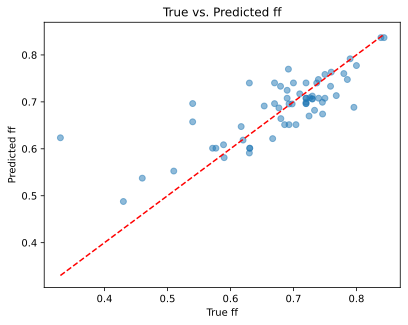

In [11]:
# 1. data split
X_ff = data.iloc[:, :25]  # X feature
y_ff = data['FF']  # target feature
X_ff_train, X_ff_test, y_ff_train, y_ff_test = train_test_split(X_ff, y_ff, test_size=0.1, random_state=42)

# 2. catBoost model

# parameter grid
param_grid_ff = {
    'iterations': [1000, 1500],      # 树的数量
    'learning_rate': [0.03, 0.1],   # 学习率
    'depth': [6, 8],                   # 树深度
    'l2_leaf_reg': [1, 3, 5, 10],         # L2正则化系数
}

# Initialize catBoost regressor
cat = CatBoostRegressor(random_state=42) 

# 3. Grid searching for ff
grid_ff_search = GridSearchCV(
    estimator=cat,
    param_grid=param_grid_ff,
    cv=5,
    scoring= {'r2': 'r2', 'neg_mse': 'neg_mean_squared_error'},  # two standard
    refit='r2',  # Select the best model based on R ²
    n_jobs=-1
)

grid_ff_search.fit(X_ff_train, y_ff_train)

# Best model for ff
best_cat_ff = grid_ff_search.best_estimator_


# 4. Model evaluation on test set for ff
y_ff_pred = best_cat_ff.predict(X_ff_test)
mse_ff = mean_squared_error(y_ff_test, y_ff_pred)
rmse_ff = mse_ff**0.5
mae_ff = mean_absolute_error(y_ff_test, y_ff_pred)
r2_ff = r2_score(y_ff_test, y_ff_pred)

print(f"Best Parameters for ff: {grid_ff_search.best_params_}")
print(f"MSE: {mse_ff:.4f}, RMSE: {rmse_ff:.4f}, R²: {r2_ff:.4f}, MAE:{mae_ff}")

# 5. Get cross-validation results for ff
cv_ff_results_df = pd.DataFrame(grid_ff_search.cv_results_)
cv_ff_results_df = cv_ff_results_df.sort_values(by='mean_test_r2', ascending=False)  # sort by r^2

# Best CV score for ff
best_cv_ff_score_r2 = grid_ff_search.best_score_
best_cv_ff_score_neg_mse = -grid_ff_search.cv_results_['mean_test_neg_mse'][grid_ff_search.best_index_]

for index, row in cv_ff_results_df.head(10).iterrows():
    print(f"Params: {row['params']}")
    print(f"Mean Test R²: {row['mean_test_r2']}")
    print(f"Mean Test Neg MSE: {row['mean_test_neg_mse']}")
    print(f"Std Test R²: {row['std_test_r2']}")
    print(f"Std Test Neg MSE: {row['std_test_neg_mse']}")
    print("-" * 50)

print(f"Best Cross-Validation R² for ff: {best_cv_ff_score_r2}")
print(f"Best Cross-Validation neg_mean_squared_error for ff: {best_cv_ff_score_neg_mse}")
print(f"Best parameters via GridSearchCV for ff: {grid_ff_search.best_params_}")


# 6. Visualization for ff
plt.scatter(y_ff_test, y_ff_pred, alpha=0.5)
plt.plot([y_ff_test.min(), y_ff_test.max()], [y_ff_test.min(), y_ff_test.max()], 'r--')
plt.xlabel('True ff')
plt.ylabel('Predicted ff')
plt.title('True vs. Predicted ff')
plt.show()

# PCE

0:	learn: 5.4585455	total: 1.68ms	remaining: 1.68s
1:	learn: 5.1132352	total: 3.49ms	remaining: 1.74s
2:	learn: 4.7939745	total: 5.03ms	remaining: 1.67s
3:	learn: 4.4972828	total: 6.46ms	remaining: 1.61s
4:	learn: 4.2547144	total: 7.99ms	remaining: 1.59s
5:	learn: 4.0471568	total: 9.67ms	remaining: 1.6s
6:	learn: 3.8399645	total: 11.2ms	remaining: 1.59s
7:	learn: 3.6461966	total: 12.8ms	remaining: 1.58s
8:	learn: 3.4742490	total: 14.5ms	remaining: 1.59s
9:	learn: 3.3251385	total: 16.8ms	remaining: 1.66s
10:	learn: 3.1864447	total: 18.4ms	remaining: 1.65s
11:	learn: 3.0683254	total: 20ms	remaining: 1.65s
12:	learn: 2.9428853	total: 21.8ms	remaining: 1.66s
13:	learn: 2.8548136	total: 23.3ms	remaining: 1.64s
14:	learn: 2.7542475	total: 24.8ms	remaining: 1.63s
15:	learn: 2.6758081	total: 26.4ms	remaining: 1.62s
16:	learn: 2.6021216	total: 28ms	remaining: 1.62s
17:	learn: 2.5382008	total: 30.5ms	remaining: 1.67s
18:	learn: 2.4766855	total: 32.1ms	remaining: 1.66s
19:	learn: 2.4209426	total:

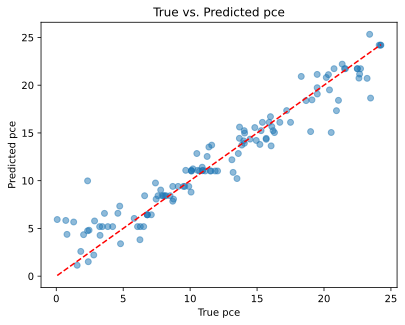

In [12]:
# 1. data split
X_pce = data.iloc[:, :25]  # X feature
y_pce = data['PCE']  # target feature
X_pce_train, X_pce_test, y_pce_train, y_pce_test = train_test_split(X_pce, y_pce, test_size=0.2, random_state=42)

# 2. catBoost model

# parameter grid
param_grid_pce = {
    'iterations': [1000],
    'learning_rate': [0.03, 0.1],
    'depth': [2, 6, 8],
    'l2_leaf_reg': [0.2, 0.5, 1]
}

# Initialize catBoost regressor
cat = CatBoostRegressor(random_state=42) 

# 3. Grid searching for pce
grid_pce_search = GridSearchCV(
    estimator=cat,
    param_grid=param_grid_pce,
    cv=5,
    scoring= {'r2': 'r2', 'neg_mse': 'neg_mean_squared_error'},  # two standard
    refit='r2',  # Select the best model based on R ²
    n_jobs=-1
)

grid_pce_search.fit(X_pce_train, y_pce_train)

# Best model for pce
best_cat_pce = grid_pce_search.best_estimator_


# 4. Model evaluation on test set for pce
y_pce_pred = best_cat_pce.predict(X_pce_test)
mse_pce = mean_squared_error(y_pce_test, y_pce_pred)
rmse_pce = mse_pce**0.5
mae_pce = mean_absolute_error(y_pce_test, y_pce_pred)
r2_pce = r2_score(y_pce_test, y_pce_pred)

print(f"Best Parameters for pce: {grid_pce_search.best_params_}")
print(f"MSE: {mse_pce:.4f}, RMSE: {rmse_pce:.4f}, R²: {r2_pce:.4f}, MAE:{mae_pce}")

# 5. Get cross-validation results for pce
cv_pce_results_df = pd.DataFrame(grid_pce_search.cv_results_)
cv_pce_results_df = cv_pce_results_df.sort_values(by='mean_test_r2', ascending=False)  # sort by r^2

# Best CV score for pce
best_cv_pce_score_r2 = grid_pce_search.best_score_
best_cv_pce_score_neg_mse = -grid_pce_search.cv_results_['mean_test_neg_mse'][grid_pce_search.best_index_]

for index, row in cv_pce_results_df.head(10).iterrows():
    print(f"Params: {row['params']}")
    print(f"Mean Test R²: {row['mean_test_r2']}")
    print(f"Mean Test Neg MSE: {row['mean_test_neg_mse']}")
    print(f"Std Test R²: {row['std_test_r2']}")
    print(f"Std Test Neg MSE: {row['std_test_neg_mse']}")
    print("-" * 50)

print(f"Best Cross-Validation R² for pce: {best_cv_pce_score_r2}")
print(f"Best Cross-Validation neg_mean_squared_error for pce: {best_cv_pce_score_neg_mse}")
print(f"Best parameters via GridSearchCV for pce: {grid_pce_search.best_params_}")


# 6. Visualization for pce
plt.scatter(y_pce_test, y_pce_pred, alpha=0.5)
plt.plot([y_pce_test.min(), y_pce_test.max()], [y_pce_test.min(), y_pce_test.max()], 'r--')
plt.xlabel('True pce')
plt.ylabel('Predicted pce')
plt.title('True vs. Predicted pce')
plt.show()

In [7]:
%config InlineBackend.figure_format = 'svg'

In [17]:
# SHapley Additive exPlanations

In [8]:
import shap
import numpy as np

In [9]:
explainer = shap.explainers.Permutation(best_cat_pce.predict, X_pce)
shap_values_pce = explainer(X_pce)

PermutationExplainer explainer: 1203it [01:26, 13.33it/s]                          


C:\Users\82308\AppData\Local\Temp\ipykernel_13104\1962671353.py:1: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_pce, X_pce, max_display=10)


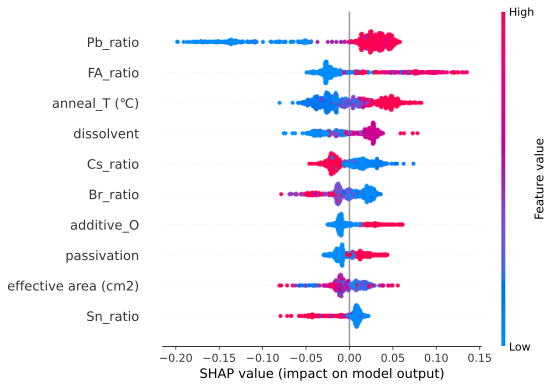

In [14]:
shap.summary_plot(shap_values_pce, X_pce, max_display=10)

In [29]:
# Output feature importance ranking
shap_values_array_pce = shap_values_pce.values 
shap_values_abs_mean = np.abs(shap_values_array_pce).mean(axis=0)  # 
feature_importance = pd.DataFrame({
    'feature': X_pce_train.columns,
    'importance': shap_values_abs_mean
})
feature_importance = feature_importance.sort_values(by='importance', ascending=False)
feature_importance

,feature,importance
3,Pb_ratio,0.041459
1,FA_ratio,0.037491
18,dissolvent,0.020902
24,anneal_T (℃),0.018611
4,Sn_ratio,0.014860
2,Cs_ratio,0.013829
16,passivation,0.011521
6,I_ratio,0.011449
12,effective area (cm^2),0.010594
7,Br_ratio,0.009413
